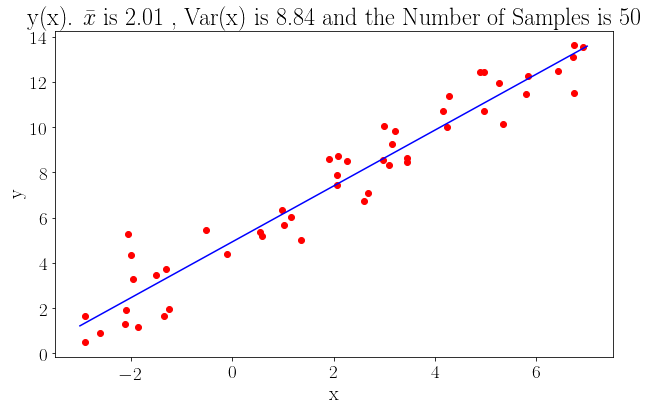

section e:avgA = 1.200, avgB = 5.001, Var(a) = 0.00226, Var(b) = 0.02790


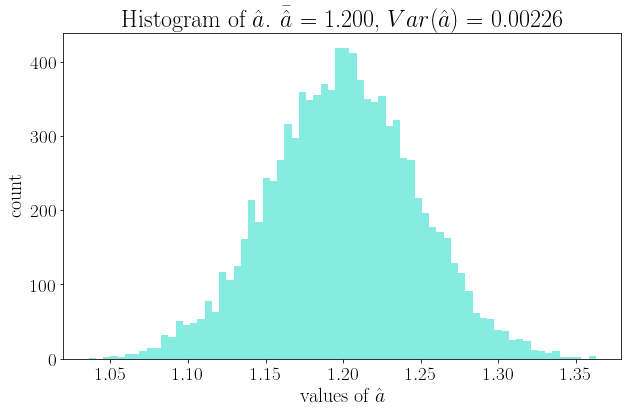

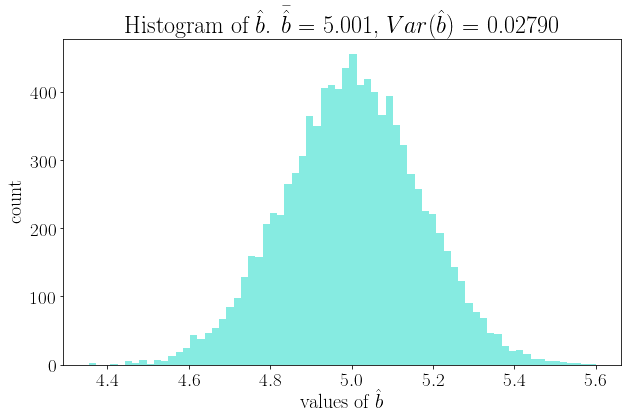

In [63]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 
plt.rcParams['figure.figsize'] = 10, 6
#פונצית עזר. מקבלת מערך וי ומערך שגיאות, ומחזירה את סכום האיברים במערך וי מנורמלים לפי סיגמה בריבוע
def sigmaSumFactor(sigma, V):
    A = 0
    for i in range (0,len(V)):
        A = A + V[i]/((sigma[i])**2)
    return A
#שימוש בקוד מהתרגיל הקודם
#הפונקציה מקבלת את המדידות באיקס, בוואי ואת השגיאות, ופולטת את ערכי ההתאמה הטובים ביותר
def abplot(y, x, deltaY):
    A = sigmaSumFactor(deltaY, x)
    B = sigmaSumFactor(deltaY, np.ones(len(x)))
    C = sigmaSumFactor(deltaY, y)
    D = sigmaSumFactor(deltaY, x*x)
    E = sigmaSumFactor(deltaY, x*y)
#   F = sigmaSumFactor(deltaY, y*y)
    aHat = ((B*E-A*C)/(D*B-A*A))
    bHat = ((C*D-A*E)/(D*B-A*A))
    return [aHat,bHat]
#הפונקציה שאנו מתאימים. בחרתי להציג את הקו כפונקציה כי לדעתי זה יותר יפה.
def f(a,b,x):
    return [i * a + b for i in x]
sampleNum = 50
x = np.random.uniform(-3, 7, sampleNum)
#נגדיר את אפסילון בתור מספר רנדונלי שמתפלג נורמלית סביב 0 עם סטיית תקן 1.
epsilon = np.random.normal(0, 1, sampleNum)
y = 1.2*x + 5 + epsilon
deltaY = np.ones(len(x))
plotVars = abplot(y, x, deltaY)

#יצירת הקו
x1 = [-3,7]
y1 = f(plotVars[0],plotVars[1],x1)
avg = np.average(x)
#should be 2 from symetry, 2 = (-3+7)/2
var = np.var(x)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(x, y, 'ro', x1, y1, 'blue')
plt.ylabel('y')
plt.xlabel('x')
plt.title('y(x).' + r' $\bar{x}$ is %.2f' %(avg) +' , Var(x) is %.2f' % (var) + ' and the Number of Samples is ' + str(sampleNum))
plt.show()
#end of section c. i did some extra stuff because its fun.

#section d:
sampleNumD = 10000
a_D = np.zeros(sampleNumD)
b_D = np.zeros(sampleNumD)
for i in range(0,sampleNumD):
    #נגדיר את אפסילון בתור מספר רנדונלי שמתפלג נורמלית סביב 0 עם סטיית תקן 1.
    epsilon_D = np.random.normal(0, 1, sampleNum)
    y_D = 1.2*x + 5 + epsilon_D
    deltaY_D = np.ones(len(x))
    plotVars_D = abplot(y_D, x, deltaY)
    
    a_D[i] = plotVars_D[0]
    b_D[i] = plotVars_D[1]
#section e:
avgA = np.average(a_D)
avgB = np.average(b_D)
varA = np.var(a_D)
varB = np.var(b_D)
#expected values: avgA = 1.2, avgB = 5. from the definition of y.
#the exepted value of varA, varB are: varA = 0.0024, varB = 0.0296. there is a complete explanation in the homework pdf file.
print("section e:avgA = %.3f"%avgA + ", avgB = %.3f"%avgB + ", Var(a) = %.5f"%varA + ", Var(b) = %.5f"%varB)
histArr = [a_D,b_D]
nameArr = ['\hat{a}', '\hat{b}']
avgArr = [avgA, avgB]
varArr = [varA, varB]
for i in range(0,2):
    #the histogram of the data
    plt.hist(histArr[i], bins = 70, facecolor='turquoise', alpha=0.63)
    
    # add a 'best fit' line
    plt.plot_date
    plt.xlabel(r'values of $%s$'%nameArr[i])
    plt.ylabel('count')
    plt.title(r'Histogram of $%s$. $\bar{%s}$ = %.3f, $Var(%s)$ = %.5f'%(nameArr[i], nameArr[i], avgArr[i], nameArr[i], varArr[i]))
    plt.show()
    
